Run the GLM on the Matlab stuff and see what I get

In [47]:
# Imports
import os
import numpy as np
import pandas as pd
from scipy import io as sio
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [48]:
%matplotlib inline

In [75]:
base_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/'
w_tmp = 'sbt_weights_net_{}.csv'

In [81]:
w_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe/sbt_weights_net_1.csv'
m_path = '/data1/guilimin/abide/pheno/sc7/model_srs_maybe_sc7_ref_full_pruned.csv'

In [82]:
# Model
model = pd.read_csv(m_path)

In [ ]:
# Make one big file
for sbt_id in np.arange(5)+1:
    weights = pd.read_csv(os.path.join(base_path, w_tmp.format(sbt_id)))
    # Give subject column a name
    weights.rename(columns={' ':'SUB_ID'}, inplace=True)
    # Drop whitespace 
    weights.columns = weights.columns.str.strip(' ')
    # Get back to normal names
    weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
    weights[weights.columns[1:]].add_prefix('net{}_'.format(sbt_id))
    model = pd.merge(model, weights, on='SUB_ID', how='inner', )

In [6]:
sbt_id = 1
weights = pd.read_csv(os.path.join(base_path, w_tmp.format(sbt_id)))
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
weights.columns = weights.columns.str.strip(' ')
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [9]:
weights.columns

Index(['SUB_ID', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5'], dtype='object')

In [7]:
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


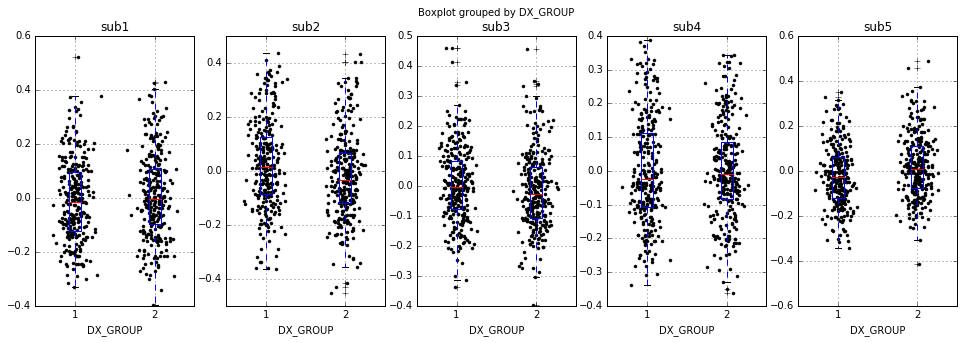

In [65]:
net_id = 12
weights = pd.read_csv(os.path.join(base_path, w_tmp.format(net_id)))
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
weights.columns = weights.columns.str.strip(' ')
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

f = plt.figure(figsize=(16,5))
for i in np.arange(5)+1:
    ax = f.add_subplot(1,5,i)
    
    for a, b in merged.groupby('DX_GROUP'):
        y = b['sub{}'.format(i)].values
        x = np.random.normal(a, 0.1, len(y))
        ax.plot(x, y, '.k')
    merged.boxplot('sub{}'.format(i), by='DX_GROUP', ax=ax)

In [57]:
merged.shape

(568, 25)

In [ ]:
net_id = 3
weights = pd.read_csv(os.path.join(base_path, w_tmp.format(net_id)))
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
weights.columns = weights.columns.str.strip(' ')
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

f = plt.figure(figsize=(16,5))
for i in np.arange(5)+1:
    ax = f.add_subplot(1,5,i)
    
    for a, b in merged.groupby('DX_GROUP'):
        y = b['sub{}'.format(i)].values
        x = np.random.normal(a, 0.08, len(y))
        ax.plot(x, y, '.k')
    ax.violinplot('sub{}'.format(i), by='DX_GROUP', ax=ax)

In [86]:
base_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe_ref_full_pruned/'
w_tmp = 'sbt_weights_net_{}.csv'

In [96]:
w_path = '/data1/guilimin/abide/subtype/sc12/srs_maybe_ref_full_pruned/'
m_path = '/data1/guilimin/abide/pheno/sc7/model_srs_maybe_sc7_ref_full_pruned.csv'
# Model
model = pd.read_csv(m_path)

In [98]:
net_id = 6
weights = pd.read_csv(os.path.join(base_path, w_tmp.format(net_id)))
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
weights.columns = weights.columns.str.strip(' ')
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


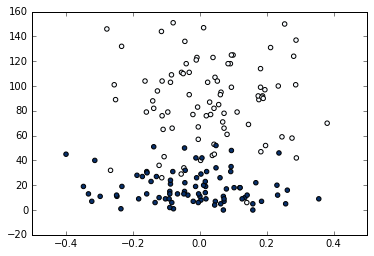

In [99]:
plt.scatter(merged.sub1.values, merged.SRS_RAW_TOTAL.values, c=merged.DX_GROUP.values, cmap=plt.cm.Blues)

In [100]:
w_path = '/data1/guilimin/abide/subtype/sc7/srs_maybe_ref_full_pruned/sbt_weights_net_6.csv'
m_path = '/data1/guilimin/abide/pheno/sc7/model_srs_pass_sc7_ref_full_pruned.csv'
model = pd.read_csv(m_path)
weights = pd.read_csv(w_path)

In [101]:
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
weights.columns = weights.columns.str.strip(' ')
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


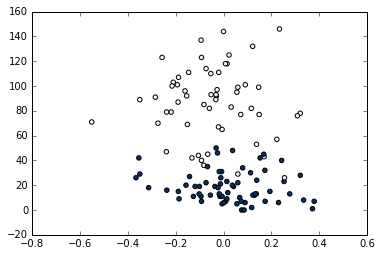

In [103]:
plt.scatter(merged.sub1.values, merged.SRS_RAW_TOTAL.values, c=merged.DX_GROUP.values, cmap=plt.cm.Blues)

In [114]:
import seaborn as sns
sns.set(color_codes=True, context='poster')

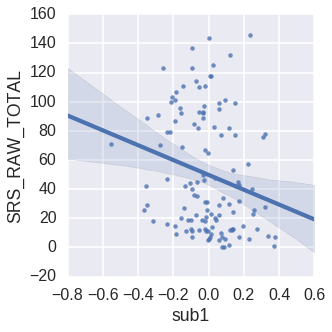

In [115]:
sns.lmplot(x='sub1', y='SRS_RAW_TOTAL', data=merged, robust=False)